<a href="https://colab.research.google.com/github/ni-ms/colab-projects/blob/CNN/CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train shape:", x_train.shape)
print("y-train shape", y_train.shape)

x_train shape: (50000, 32, 32, 3)
y-train shape (50000,)


In [ ]:
# Cnn expects 3d input for convolution. Add a supurfluous 1d
x_train.shape

(50000, 32, 32, 3)

In [ ]:
K = len(set(y_train))
K

10

In [ ]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# We are increasing the number of feature maps for each layer
# The init and call methods are implemented in python for the (i) thing
x = Conv2D(32, (3,3), strides= 2, activation='relu')(i)
x = Conv2D(64, (3,3), strides= 2, activation='relu')(x)
x = Conv2D(128, (3,3), strides= 2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)
# First argument is a list of inputs or a single input
# Second argument is a list of outputs or a single output
model = Model(i,x)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 55s 34ms/step - loss: 1.5058 - accuracy: 0.4529 - val_loss: 1.2869 - val_accuracy: 0.5391
Epoch 2/15
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1644 - accuracy: 0.5848 - val_loss: 1.0517 - val_accuracy: 0.6228
Epoch 3/15
1563/1563 [==============================] - 51s 33ms/step - loss: 1.0040 - accuracy: 0.6429 - val_loss: 0.9976 - val_accuracy: 0.6473
Epoch 4/15
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8833 - accuracy: 0.6858 - val_loss: 0.9009 - val_accuracy: 0.6831
Epoch 5/15
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7826 - accuracy: 0.7247 - val_loss: 0.9087 - val_accuracy: 0.6837
Epoch 6/15
1563/1563 [==============================] - 51s 33ms/step - loss: 0.6916 - accuracy: 0.7543 - val_loss: 0.8911 - val_accuracy: 0.6936
Epoch 7/15
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6171 - accuracy: 0.7807 - val_loss: 0.8546 -

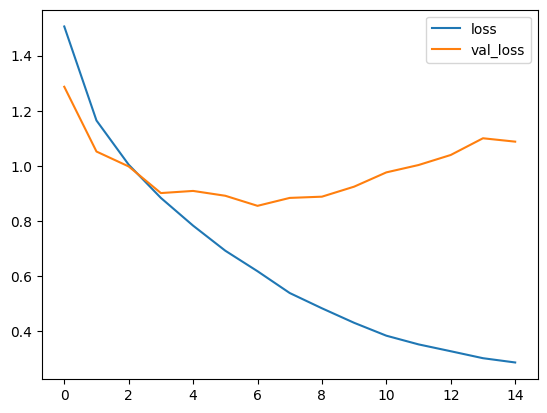

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


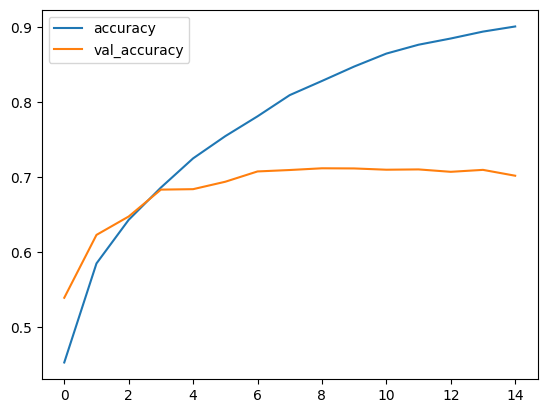

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
#If val l


313/313 [==============================] - 3s 8ms/step
confusion matrix without normalization
[[857  17  21   5  15  10   3   6  43  23]
 [ 37 801   5   7   4   6   7   7  37  89]
 [110   9 562  62  97  69  38  32  12   9]
 [ 50  12  66 504  66 168  55  45  22  12]
 [ 34   3  72  61 664  39  35  73  14   5]
 [ 40   6  36 183  49 588  16  61  11  10]
 [ 21   7  55  76  52  30 731   6  16   6]
 [ 40   2  29  33  57  69   4 750   3  13]
 [126  17  14  10   7   5   4   2 798  17]
 [ 67  75   9  17   5  13   5  15  33 761]]


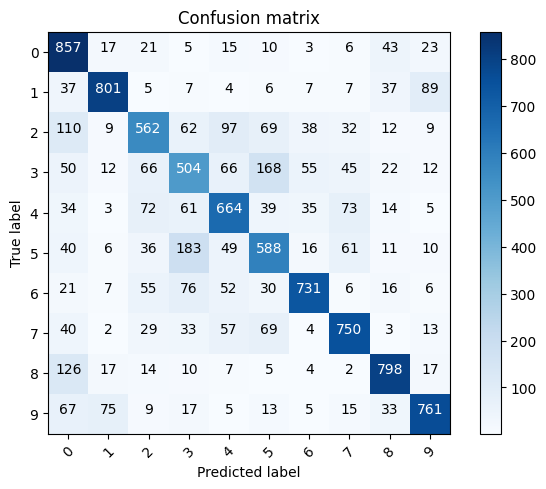

In [ ]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix
  Normalization can be applied by setting normalize=True
  """
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("confusion matrix without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i,j] > thresh else "black"
             )
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [ ]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: dog Predicted: deer')

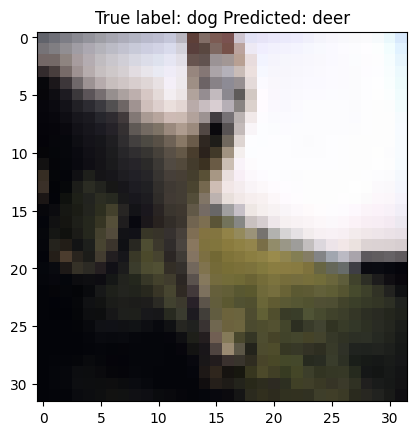

In [ ]:
# Show misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predicted: %s"%(labels[y_test[i]],labels[p_test[i]]))